### Analyzing the World Bank's Twitter Feed, Judy Yang, DAT10 Project
### Part 4. Text Analysis

In [40]:
pwd

u'/Users/judyyang/Documents/GA_DS_course/Final_Project/notebooks'

In [41]:
from datetime import datetime
import time
import json
import operator 
import preprocess
from collections import Counter
#from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#% sign 

import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

from ttp import ttp

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

In [42]:
wb = pd.read_json('./data/WorldBank_all_processed_14feb_2016')

# 1) Create dependent variables
wb['retweet_high']= np.where(wb.retweet_count>1, 1, 0)
wb['favorite_high']= np.where(wb.favorite_count>1, 1, 0)

# 2) Create dummy variables for each account
Iuser = pd.get_dummies(wb.user_screen_name, prefix='Iuser')
# concatenate the original DataFrame and the dummy DataFrame
wb = pd.concat([wb, Iuser], axis=1)

In [43]:
#Create time columns and dummies, and append
wb['year']=wb.created_at.apply(lambda x: x.strftime('%y'))
wb['year2'] = wb.year.astype('category', categories=["09", "10", "11" ,"12", "13", "14" , "15", "16"], ordered=True)

wb['year_month']=wb.created_at.apply(lambda x: x.strftime('%y-%m'))
wb['hour']=wb.created_at.apply(lambda x: x.strftime('%H'))
wb['hour_cat'] = wb.hour.astype('category', categories=["00", "01", "02", "03", "04", "05", "06", "07","08" ,"09", "10", "11" ,"12", "13", "14" , "15", "16", "17", "18", "19", "20", "21", "22", "23"], ordered=True)

Ihour= pd.get_dummies(wb.hour, prefix='Ihour')
wb = pd.concat([wb, Ihour], axis=1)

In [44]:
wb = wb[(wb.is_RT==0)]
wb.shape

(71287, 84)

### How does tweeting behavior differ between accounts

### Predictions: what determines high retweets and favorites?

#### Part 1. Linear Regression

How much of retweet or favorite responses can be explained by non-text

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [46]:
# Exercise :  define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(cols):
   
    X = wb[cols]
    y= wb.favorite_high
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
    
    # instantiate and fit
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # print the coefficients
    true=y_test
    pred=linreg.predict(X_test)
    rmse=np.sqrt(metrics.mean_squared_error(true, pred))
    
    return rmse

In [47]:
# compare different sets of features
#1) has_at 
print train_test_rmse(['has_at'])

#2) has a hashtag
print train_test_rmse(['has_ht'])

#3) has_at, has a hashtag, has a link, is a RT
print train_test_rmse(['has_at', 'has_ht', 'has_link'])

#4) dummy of users
print train_test_rmse([u'Iuser_IFC_org', u'Iuser_JimKim_WBG', u'Iuser_MIGAWorldBank', u'Iuser_WBCaribbean', u'Iuser_WBG_Agriculture',
       u'Iuser_WBG_Cities', u'Iuser_WBG_Climate', u'Iuser_WBG_Dev4Peace', u'Iuser_WBG_Education', u'Iuser_WBG_Energy', u'Iuser_WBG_Environment', u'Iuser_WBG_Finance', u'Iuser_WBG_Gender', u'Iuser_WBG_Health',
       u'Iuser_WBG_LeadINLearn', u'Iuser_WBG_PPP', u'Iuser_WBG_Poverty', u'Iuser_WBG_SPLabor', u'Iuser_WBG_Transport',
       u'Iuser_WBOpenFinances', u'Iuser_WBPubs', u'Iuser_WBedutech', u'Iuser_WorldBank', u'Iuser_WorldBankAfrica', u'Iuser_WorldBankECA', u'Iuser_WorldBankIndia', u'Iuser_WorldBankKenya', u'Iuser_WorldBankPSD',
       u'Iuser_WorldBankPhotos', u'Iuser_WorldBankSAsia', u'Iuser_WorldBankSEI', u'Iuser_WorldBankVideos', u'Iuser_WorldBankWater', u'Iuser_WorldBank_IEG', u'Iuser_impacteval', u'Iuser_wb_research', u'Iuser_wbg_gov', u'Iuser_worldbankdata'])

#5) 3+4
print train_test_rmse(['has_at', 'has_ht', 'has_link' , 'is_RT', u'Iuser_IFC_org', u'Iuser_JimKim_WBG', u'Iuser_MIGAWorldBank', u'Iuser_WBCaribbean', u'Iuser_WBG_Agriculture',
       u'Iuser_WBG_Cities', u'Iuser_WBG_Climate', u'Iuser_WBG_Dev4Peace', u'Iuser_WBG_Education', u'Iuser_WBG_Energy', u'Iuser_WBG_Environment', u'Iuser_WBG_Finance', u'Iuser_WBG_Gender', u'Iuser_WBG_Health',
       u'Iuser_WBG_LeadINLearn', u'Iuser_WBG_PPP', u'Iuser_WBG_Poverty', u'Iuser_WBG_SPLabor', u'Iuser_WBG_Transport', u'Iuser_WBOpenFinances', u'Iuser_WBPubs', u'Iuser_WBedutech', u'Iuser_WorldBank', u'Iuser_WorldBankAfrica',
       u'Iuser_WorldBankECA', u'Iuser_WorldBankIndia', u'Iuser_WorldBankKenya', u'Iuser_WorldBankPSD', u'Iuser_WorldBankPhotos', u'Iuser_WorldBankSAsia', u'Iuser_WorldBankSEI', u'Iuser_WorldBankVideos',
       u'Iuser_WorldBankWater', u'Iuser_WorldBank_IEG', u'Iuser_impacteval', u'Iuser_wb_research', u'Iuser_wbg_gov', u'Iuser_worldbankdata'])

#6) 5 + year
print train_test_rmse(['has_at', 'has_ht', 'has_link' , 'is_RT', u'Iuser_IFC_org', u'Iuser_JimKim_WBG', u'Iuser_MIGAWorldBank', u'Iuser_WBCaribbean', u'Iuser_WBG_Agriculture',
       u'Iuser_WBG_Cities', u'Iuser_WBG_Climate', u'Iuser_WBG_Dev4Peace', u'Iuser_WBG_Education', u'Iuser_WBG_Energy',
       u'Iuser_WBG_Environment', u'Iuser_WBG_Finance', u'Iuser_WBG_Gender', u'Iuser_WBG_Health', u'Iuser_WBG_LeadINLearn', u'Iuser_WBG_PPP', u'Iuser_WBG_Poverty', u'Iuser_WBG_SPLabor', u'Iuser_WBG_Transport',
       u'Iuser_WBOpenFinances', u'Iuser_WBPubs', u'Iuser_WBedutech', u'Iuser_WorldBank', u'Iuser_WorldBankAfrica',
       u'Iuser_WorldBankECA', u'Iuser_WorldBankIndia', u'Iuser_WorldBankKenya', u'Iuser_WorldBankPSD', u'Iuser_WorldBankPhotos', u'Iuser_WorldBankSAsia', u'Iuser_WorldBankSEI', u'Iuser_WorldBankVideos',
       u'Iuser_WorldBankWater', u'Iuser_WorldBank_IEG', u'Iuser_impacteval', u'Iuser_wb_research', u'Iuser_wbg_gov', u'Iuser_worldbankdata', 'year',
                      u'Ihour_00',              u'Ihour_01',              u'Ihour_02',              u'Ihour_03',
                    u'Ihour_04',              u'Ihour_05',              u'Ihour_06',              u'Ihour_07',
                    u'Ihour_08',              u'Ihour_09',              u'Ihour_10',              u'Ihour_11',
                    u'Ihour_12',              u'Ihour_13',              u'Ihour_14',              u'Ihour_15',
                    u'Ihour_16',              u'Ihour_17',              u'Ihour_18',              u'Ihour_19',
                    u'Ihour_20',              u'Ihour_21',              u'Ihour_22',              u'Ihour_23'])

0.487466320767
0.485751100135
0.485044715407
0.398856454309
0.398076404927
0.39424989454


Comparing testing RMSE with null RMSE
Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [323]:
# split X and y into training and testing sets
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.49258373541733785

In [48]:
# define X and y
#X = wb.text_clean
X=wb.tags

y = wb.retweet_high
#y = wb.favorite_high

wb.retweet_high.describe()
#wb.favorite_high.describe()

count    71287.000000
mean         0.516490
std          0.499732
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: retweet_high, dtype: float64

In [121]:
wb.retweet_count.describe()

count    71287.000000
mean         6.261913
std         19.884742
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1941.000000
Name: retweet_count, dtype: float64

In [122]:
wb.favorite_count.describe()

count    71287.000000
mean         3.993561
std         16.345461
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1406.000000
Name: favorite_count, dtype: float64

**Part 2. Text Analysis**
- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

Tokenization

In [ ]:
# Tokenize into words
tokens = []
for tweet in tweets_text:
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]

** Topic Modelling **

In [ ]:
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
stoplist = set(CountVectorizer(stop_words='english').get_stop_words() )

In [125]:
X=wb.text_clean
texts = [[word for word in document.lower().split() if word not in stoplist] for document in list(X)]

# count up the frequency of each word
frequency = defaultdict(int)
for text in texts:
     for token in text:
         frequency[token] += 1    
        
# (2) remove words that only occur a small number of times, fixing a feature space that's needlessly big.
# once in the whole corpus, not just once in a single document

texts = [[token for token in text if frequency[token] > 1] for text in texts]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=7, alpha = 'auto')

lda.show_topics()

[u'0.019*&amp; + 0.015*new + 0.010*learn + 0.009*climate + 0.008*@ifc_org + 0.007*sustainable + 0.006*apply + 0.006*@worldbank + 0.006*don\u2019t + 0.005*help',
 u'0.022*&amp; + 0.014*women + 0.011*#climate + 0.011*new + 0.010*sector + 0.008*bank + 0.008*#get2equal + 0.007*world + 0.007*#women + 0.007*@worldbank',
 u'0.039*&amp; + 0.016*#finaccess2020 + 0.014*#financialinclusion + 0.013*help + 0.012*access + 0.010*financial + 0.009*new + 0.008*countries + 0.007*growth + 0.007*energy',
 u'0.020*&amp; + 0.013*new + 0.009*@worldbank + 0.007*financing + 0.006*#foodsecurity + 0.006*cost + 0.006*#finance + 0.005*blog + 0.005*@guardian + 0.005*@worldbankafrica',
 u'0.016*&amp; + 0.010*help + 0.007*farmers + 0.007*#climatechange + 0.006*@worldbank + 0.006*poor + 0.005*new + 0.005*helping + 0.005*build + 0.005*@cgap',
 u'0.034*&amp; + 0.017*join + 0.015*live + 0.014*climate + 0.012*#climateaction + 0.009*#cop21 + 0.008*change + 0.008*finance + 0.008*watch + 0.008*#wblive',
 u'0.021*| + 0.014*ca

In [126]:
lda.get_topic_terms()

AttributeError: 'LdaModel' object has no attribute 'get_topic_terms'

** Topic model only the top retweet and favorite tweets **

In [124]:
X=wb[(wb.retweet_count>=5)|(wb.favorite_count>=3)].text_clean

texts = [[word for word in document.lower().split() if word not in stoplist] for document in list(X)]

# count up the frequency of each word
frequency = defaultdict(int)
for text in texts:
     for token in text:
         frequency[token] += 1 
        
# remove words that only occur a small number of times, fixing a feature space that's needlessly big.
# once in the whole corpus, not just once in a single document
texts = [[token for token in text if frequency[token] > 1] for text in texts]


dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=7, alpha = 'auto')

lda.show_topics()

[u'0.036*carbon + 0.020*amp + 0.017*new + 0.016*solar + 0.012*emissions + 0.011*climateaction + 0.011*cop21 + 0.010*low + 0.010*countries + 0.009*climatechange',
 u'0.033*amp + 0.030*s + 0.012*africa + 0.011*school + 0.010*growth + 0.009*economic + 0.009*education + 0.008*women + 0.007*world + 0.007*markets',
 u'0.028*amp + 0.019*s + 0.015*cities + 0.011*access + 0.011*climate + 0.009*help + 0.009*private + 0.008*sustainable + 0.008*water + 0.007*public',
 u'0.025*poverty + 0.020*amp + 0.017*world + 0.013*gender + 0.012*s + 0.008*china + 0.008*countries + 0.008*endpoverty + 0.007*ending + 0.007*extreme',
 u'0.032*amp + 0.031*climate + 0.029*energy + 0.013*renewable + 0.013*cop20 + 0.013*pricing + 0.012*agriculture + 0.012*s + 0.011*ways + 0.010*resilience',
 u'0.017*s + 0.017*amp + 0.015*ifc + 0.013*new + 0.011*development + 0.009*countries + 0.008*2015 + 0.008*report + 0.008*join + 0.007*transport',
 u'0.030*climate + 0.025*amp + 0.023*change + 0.021*s + 0.016*women + 0.014*climateact

Train/test/split

In [49]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# use CountVectorizer to create document-term matrices from X_train and X_test
#vect = CountVectorizer()
# remove English stop words
vect = CountVectorizer(stop_words='english', lowercase=True)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [51]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(53465, 4641)

In [52]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'wwwek', u'wysd', u'yale', u'ycities', u'yearinreview', u'yearsoflivingdangerously', u'yearsproject', u'yemen', u'yemeni', u'yeswecan', u'yir', u'young', u'youngafrica', u'youngprofessionals', u'yourshot', u'youstink', u'youth', u'youth2030', u'youth4climate', u'youthbiz', u'youthday', u'youthdialogues', u'youthdialougues', u'youthemployment', u'youtheo', u'youthforchange', u'youthinag', u'youthink', u'youthnow', u'youths', u'youthskillsday', u'youthsummit', u'youthunemployment', u'youthwellbeingindex', u'youthwill', u'youtube', u'yugoslavia', u'za', u'zaatari', u'zambezi', u'zambia', u'zanzibar', u'zerohunger', u'zeropoverty2030', u'zerozero', u'zikavirus', u'zimbabwe', u'ziway', u'zoellick', u'zuckerberg']


In [53]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Predict retweet or favorites

In [54]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.625350690158


In [55]:
# calculate null accuracy
y_test_binary = np.where(y_test==1, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.51509370441027946

In [56]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

In [57]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 1))
tokenize_test(vect)

Features:  4648
Accuracy:  0.625350690158


In [58]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  21926
Accuracy:  0.626416788239


In [59]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 3))
tokenize_test(vect)

Features:  31032
Accuracy:  0.625911794411


In [60]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 4))
tokenize_test(vect)

Features:  33984
Accuracy:  0.625911794411


**Part 5. Introduction to TextBlob**


In [61]:
# print the first review
print wb.text_clean[0]

Eliminating  inequality is not only necessary for realizing one s potential but also for living with dignity  


In [62]:
# save it as a TextBlob object
review = TextBlob(wb.text_clean[0])

In [63]:
# list the words
review.words

WordList([u'Eliminating', u'inequality', u'is', u'not', u'only', u'necessary', u'for', u'realizing', u'one', u's', u'potential', u'but', u'also', u'for', u'living', u'with', u'dignity'])

In [64]:
# list the sentences
review.sentences

[Sentence("Eliminating  inequality is not only necessary for realizing one s potential but also for living with dignity  ")]

In [65]:
# some string methods are available
review.lower()

TextBlob("eliminating  inequality is not only necessary for realizing one s potential but also for living with dignity  ")

**Part 6. Stemming and Lemmatization**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [66]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in review.words]

[u'elimin', u'inequ', u'is', u'not', u'onli', u'necessari', u'for', u'realiz', u'one', u's', u'potenti', u'but', u'also', u'for', u'live', u'with', u'digniti']


**Part 7. Term Frequency and Inverse Document Frequency:**
- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [67]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(wb.text_clean)
features = vect.get_feature_names()
dtm.shape

(71287, 24072)

**Part 8: Using TF-IDF to Summarize a Tweet**

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [68]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 120:
        review_id = np.random.randint(0, len(wb))
        review_text = wb.text_clean[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [69]:
wb.text_clean.describe()

count     71287
unique    60627
top            
freq         43
Name: text_clean, dtype: object

In [70]:
summarize()

KeyError: 18931.0

#### Part 9: Sentiment Analysis

In [71]:
# understanding the apply method
wb.head(1)

,created_at,favorite_count,has_at,has_ht,has_link,id,index,is_RT,length,retweet_count,tags,text,text_clean,user_screen_name,users,retweet_high,favorite_high,Iuser_IFC_org,Iuser_JimKim_WBG,Iuser_MIGAWorldBank,Iuser_WBCaribbean,Iuser_WBG_Agriculture,Iuser_WBG_Cities,Iuser_WBG_Climate,Iuser_WBG_Dev4Peace,...,hour_cat,Ihour_00,Ihour_01,Ihour_02,Ihour_03,Ihour_04,Ihour_05,Ihour_06,Ihour_07,Ihour_08,Ihour_09,Ihour_10,Ihour_11,Ihour_12,Ihour_13,Ihour_14,Ihour_15,Ihour_16,Ihour_17,Ihour_18,Ihour_19,Ihour_20,Ihour_21,Ihour_22,Ihour_23
0,2016-02-01 23:20:36,1,False,True,True,694299339649347584,0,False,132,1,inequality,Eliminating #inequality is not only necessary ...,Eliminating inequality is not only necessary ...,WBG_Poverty,,0,0,0,0,0,0,0,0,0,0,...,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [73]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
wb['sentiment'] = wb.text_clean.apply(detect_sentiment)

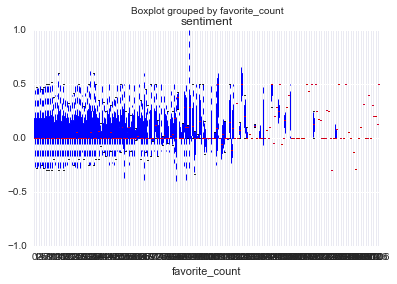

In [74]:
# box plot of sentiment grouped by stars
wb.boxplot(column='sentiment', by='favorite_count')
#like good news

In [104]:
wb['retweet_high']= np.where(wb.retweet_count>200, 1, 0)
wb['favorite_high']= np.where(wb.favorite_count>400, 1, 0)

World Bank tweets about both good and bad (Ebola, earthquakes, and reports, and successes). There is not really a sentiment, but looking at other accounts, it appears that happier tweets do better


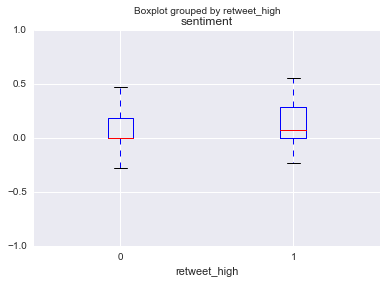

In [105]:
wb[(wb.user_screen_name!="WorldBank")|(wb.user_screen_name!="JimKim_WBG")].boxplot(column='sentiment', by='retweet_high')

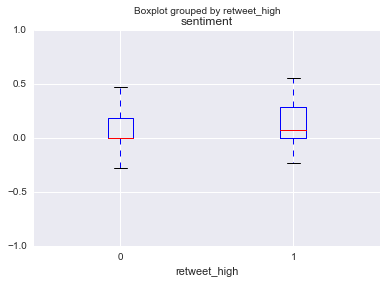

In [106]:
wb.boxplot(column='sentiment', by='retweet_high')

In [76]:
# list reviews with most positive sentiment
wb[wb.sentiment == 1].text.head()

10295    How are teachers providing relief after #Nepal...
10368    How to avoid the pitfalls of “best practices” ...
10953    @RafMBatista: If you have it online, send us t...
11163    @kaushikcbasu: deficiency on data remains very...
1156     What is the best way to measure #poverty in #A...
Name: text, dtype: object

In [77]:
# list reviews with most negative sentiment
wb[wb.sentiment == -1].text.head()

10081    A story of a community rebuilding their life a...
10625    Tesfay &amp; his father had to deal with Ethio...
12550    Watch:  The Ebola crisis in November 2015, one...
15958    PODCAST: Two years after the terrible 7.0 magn...
19208    "The risk of inaction may well be the worst op...
Name: text, dtype: object

In [217]:
#time with 